## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\naman\Downloads\Crop-Recommendation-System-master\Crop-Recommendation-System-master\Dataset\Crop_dataset.csv")

In [4]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Renaming the columns

In [5]:
dataset.columns = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall", "Crop"]

In [6]:
dataset.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Describing the dataset

In [7]:
dataset.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
dataset.corr()

ValueError: could not convert string to float: 'rice'

## Splitting data into dependent and independent variables

In [11]:
x = dataset.iloc[:, :-1].values # independent
y = dataset.iloc[:, -1].values # dependent

In [12]:
x

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [13]:
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

## Displaying the unique features

In [14]:
np.unique(y)

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

C:\Users\naman\AppData\Local\Temp\ipykernel_23220\1301284317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Crop',data=dataset, palette="crest")


<Axes: xlabel='count', ylabel='Crop'>

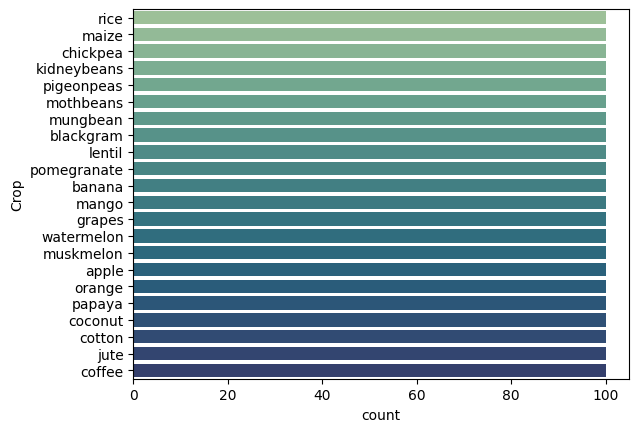

In [15]:
sns.countplot(y='Crop',data=dataset, palette="crest")

In [16]:
len(np.unique(y))

22

## Visualizing crop vs climate features using boxplots

<Axes: xlabel='pH', ylabel='Crop'>

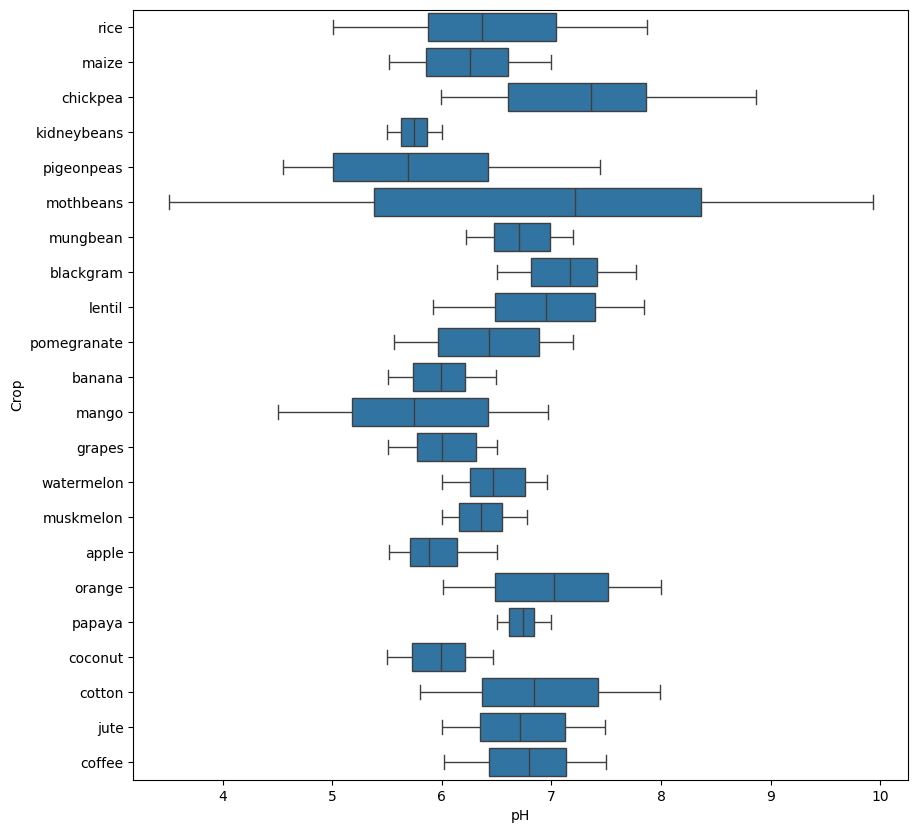

In [17]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='pH',data=dataset)

<Axes: xlabel='Temperature', ylabel='Crop'>

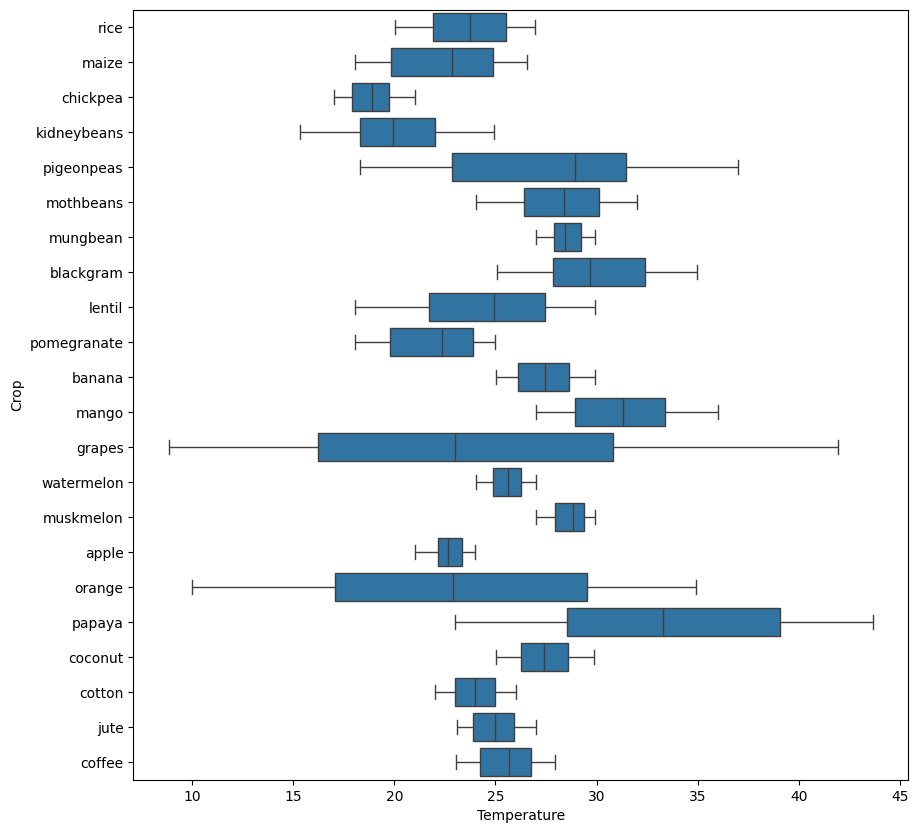

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='Temperature',data=dataset)

<Axes: xlabel='Rainfall', ylabel='Crop'>

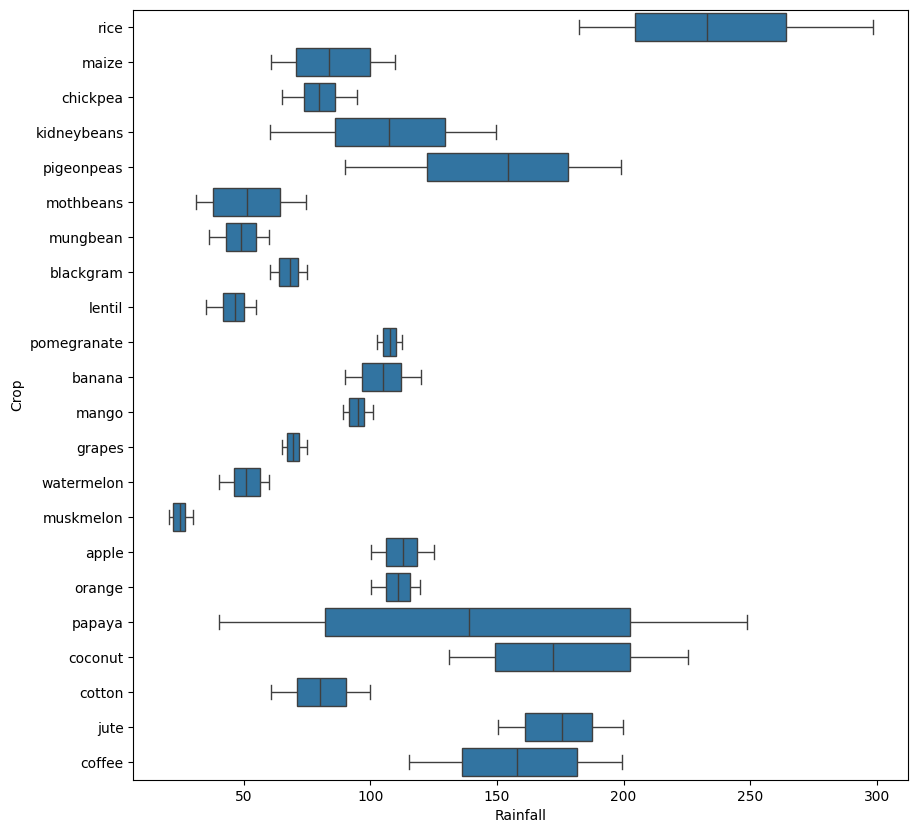

In [19]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='Rainfall',data=dataset)

##  Encoding categorical values

In [20]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
y = L.fit_transform(y)

##Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

## Splitting training and testing data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [23]:
x_train.shape

(1760, 7)

In [24]:
x_test.shape

(440, 7)

In [25]:
y_train.shape

(1760,)

In [26]:
y_test.shape

(440,)

## Training the Decision tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt_classifier,
    out_file="crop_tree.dot", 
    feature_names=dataset.columns[:-1],
    class_names=np.unique(dataset.iloc[:, -1].values),
    filled=True,
    rounded=True,
)

In [29]:
# Converting the .dot file generated to .png file.
# Use % or ! to interact with the system's terminal.
! dot -Tpng crop_tree.dot -o crop_tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
from IPython.display import Image
Image(filename="/content/crop_tree.png")

FileNotFoundError: [Errno 2] No such file or directory: '/content/crop_tree.png'

## Testing the Model

In [31]:
pred_dt = dt_classifier.predict(x_test)

## Calculating the Accuracy score

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9818181818181818

## Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

<Axes: >

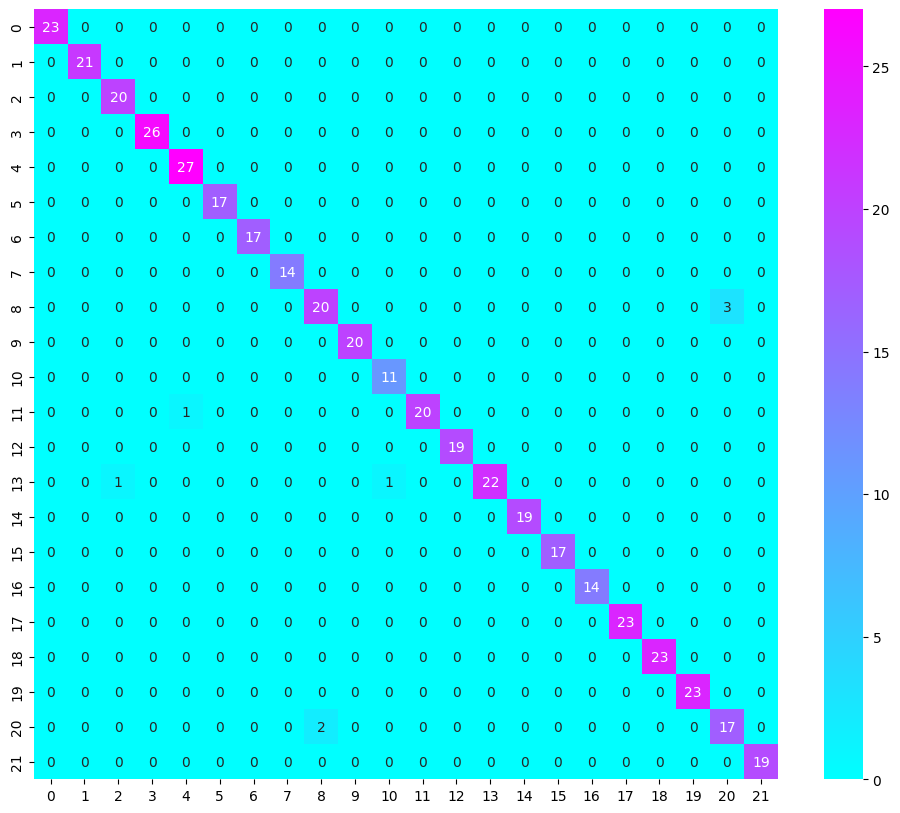

In [34]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, ax=ax, cmap="cool")

## Training the SGD Classifier

In [35]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

## Testing the Model

In [36]:
pred_sgd = sgd_classifier.predict(x_test)

## Calculating Accuracy score 

In [37]:
accuracy_score(y_test, pred_sgd)

0.9136363636363637

## Confusion Matrix

<Axes: >

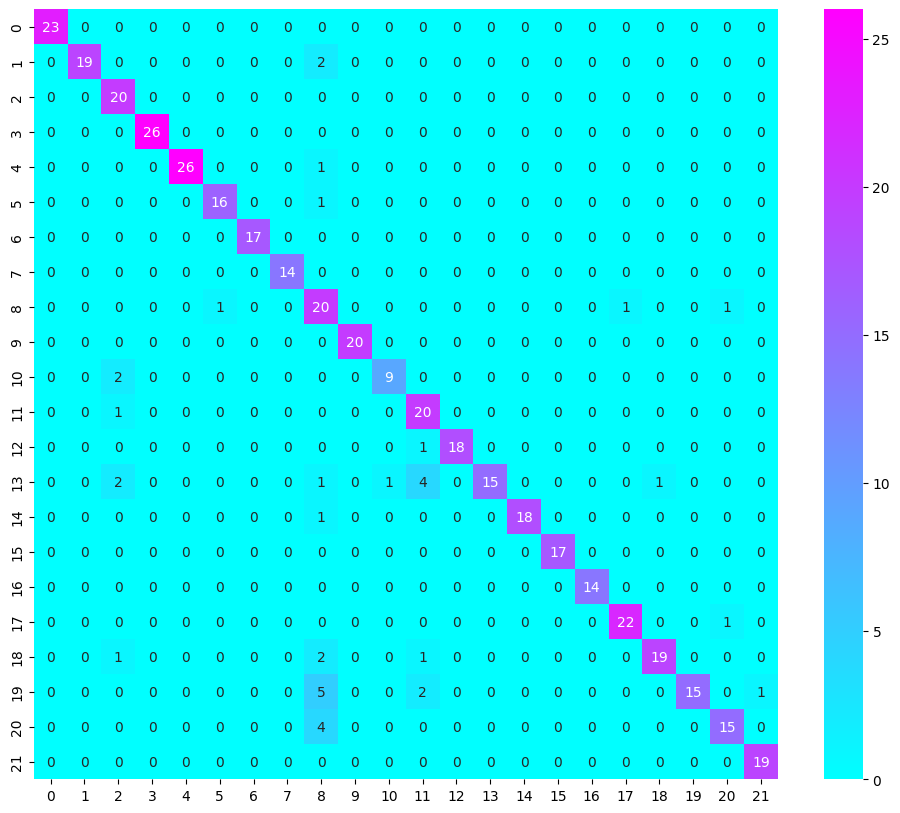

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_sgd), annot=True, ax=ax, cmap="cool")

## Installing parfit

In [39]:
! pip install parfit

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

## Finding the best hyperparameters using parfit

In [40]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           x_train, y_train, x_test, y_test, 
           metric = accuracy_score,
           scoreLabel = "AUC")

print(bestModel, bestScore)

ModuleNotFoundError: No module named 'parfit'

In [41]:
from sklearn.linear_model import SGDClassifier
sgd_classifierP = SGDClassifier(loss='log', n_jobs=-1)
sgd_classifierP.fit(x_train, y_train)

InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'modified_huber', 'squared_hinge', 'log_loss', 'epsilon_insensitive', 'squared_error', 'squared_epsilon_insensitive', 'perceptron', 'hinge', 'huber'}. Got 'log' instead.

## Testing the Model

In [42]:
pred_sgdP = sgd_classifierP.predict(x_test)

NotFittedError: This SGDClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Calculating accuracy

In [ ]:
accuracy_score(y_test, pred_sgdP)

0.9386363636363636

## Confusion Matrix

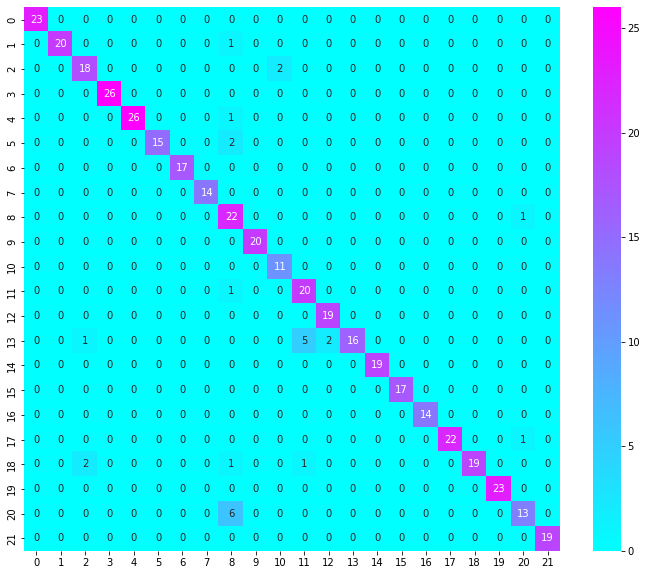

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_sgdP), annot=True, ax=ax, cmap="cool")

## Training the KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Testing the Model

In [ ]:
pred_kn = kn_classifier.predict(x_test)

## Confusion Matrix

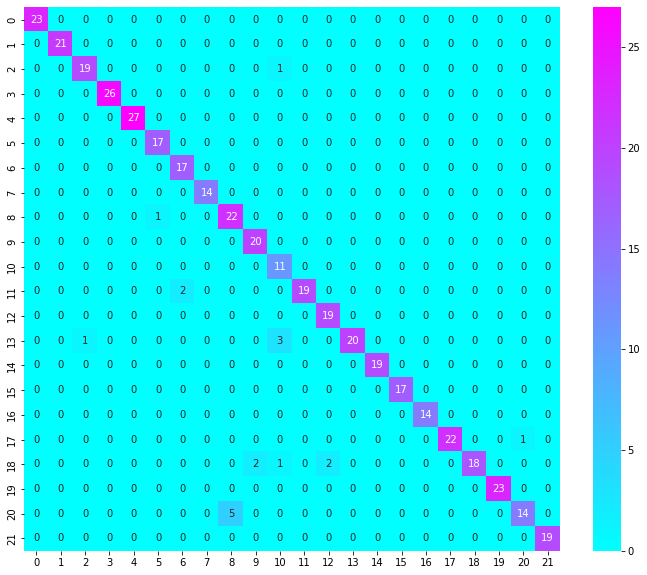

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_kn), annot=True, ax=ax, cmap="cool")

## Calculating accuracy score

In [ ]:
accuracy_score(y_test, pred_kn)

0.9568181818181818

In [ ]:
from sklearn.ensemble import VotingClassifier
models = [("DT", dt_classifier),
          ("SGD", sgd_classifier),
          ("KNN", kn_classifier)]

vt_classifier = VotingClassifier(estimators=models, voting="hard")

## Training the Ensemble Model

In [ ]:
vt_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                             ('SGD', SGDClassifier()),
                             ('KNN', KNeighborsClassifier())])

## Testing the Model

In [ ]:
pred_vt = vt_classifier.predict(x_test)

## Calculating accuracy score

In [ ]:
accuracy_score(y_test, pred_vt)

0.9636363636363636

## Confusion Matrix

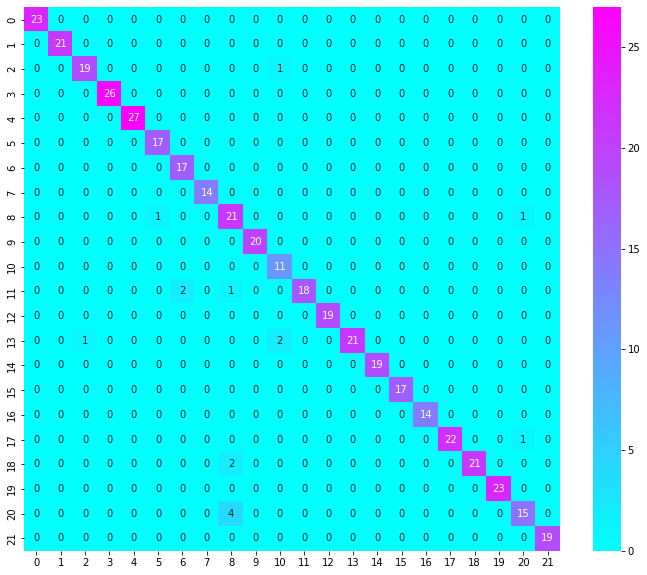

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, pred_vt), annot=True, ax=ax, cmap="cool")

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_vt, average="weighted")

0.9642100018223011

## Testing on foreign data

In [ ]:
outside_data = np.array([[60, 55, 45, 21.408, 83.329, 5.935, 287.576]])
outside_data = sc.transform(outside_data)
outside_data

array([[ 0.25598625,  0.04964684, -0.06219024, -0.83124202,  0.53225002,
        -0.69075533,  3.35079335]])

In [ ]:
dt_classifier.predict(outside_data)

array([20])

In [ ]:
sgd_classifier.predict(outside_data)

array([20])

In [ ]:
sgd_classifierP.predict(outside_data)

array([20])

In [ ]:
kn_classifier.predict(outside_data)

array([20])

In [ ]:
vt_classifier.predict(outside_data)

array([20])